# Shoppers Intent - Classification Techniques

## What is the data, where is it from, what does it mean?

**Source**: https://www.kaggle.com/roshansharma/online-shoppers-intention?select=online_shoppers_intention.csv & https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#

**Citation**: Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). https://link.springer.com/article/10.1007%2Fs00521-018-3523-0

The Online Shoppers Intention Data Set contains data on online web sessions. Each session in the rows is a different user, across a 1 year period, this is to reduce the impact of campaigns, seasonality and user profiles skewing results.

Data donated: 2018-Aug-31





## Question/Goal: 

Can we identify likelihood to buy from online the behaviour?

## Fields

**The number of different types of pages visited in that session and the total time spent in each category. Using the URL of the pages visited by the user.**

*NOTE: If the website has a terrible structure, page areas will be less reliable.*

**Administrative**: Number of pages of this section of the website visited in the session. **float64, range 0.00 to 27.00**

**Administrative_Duration**: Total time spent in this section of the website for the session **float64, range -1.00 to  3398.75**

**Informational**: Number of pages of this section of the website visited in the session **float64, range 0.00 to 24.00**

**Informational_Duration**: Total time spent in this section of the website for the session **float64, range -1.00 to 2549.475**

**ProductRelated**: Number of pages of this section of the website visited in the session **float64, range 0.00 to 705.00**

**ProductRelated_Duration**: Total time spent in this section of the website for the session **float64, range -1.00 to 63973.522230**


**General Metrics**

**BounceRates**: Percent of visitors who enter the site and leave without viewing other pages **float64, range 0.00 to 0.20**

**ExitRates**: Percent of visitors who enter the site to a page, and exit the site to a different website **float64, range 0.00 to 0.20**

**PageValues**: The average value for the page a user visits before landing on the goal page. Gives an idea of which pages contribute to sites revenue **float64, range 0.00 to 361.763742**

**SpecialDay**: Indicates the closeness of the site visiting time to a special event such as Mother's Day or Valentines, during which sessions are more likely to be finalised with transaction. This also considers duration of the order and delivery date e.g. Valentines is nonzero 2-12th February, and zero before and after this day. **float64, range 0.00 to 1.00**

**Month**: Month value of site visit **object**

**OperatingSystems**: OS of the device used **int64, range 1.00 to 8.00**

**Browser**: Browser used during visit **int64, range 1.00 to 13.00**

**Region**: Not clearly defined, assumed to be a numeric representation of region of website visitor location **int64, range 1.00 to 9.00**

**TrafficType**: Not clearly defined, assumed to be similar to origin such as: Direct, organic, referral, social, display, paid etc. **int64, range 1.00 to 20.00**

**VisitorType**: Returning or new visitors **object**

**Weekend**: True False check of day **bool**

**Revenue**: Class label, true or false **bool**

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets, metrics, svm
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import utils
import sklearn as sk
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

import os
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, classification_report

from sklearn.datasets import make_blobs

/Users/rachaelbryce/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import and Review the data 

In [2]:
#!pwd
#Read the data into a data frame
file = '../../DATA/online_shoppers_intention 2.csv'
shopping = pd.read_table(file, header=0, sep=',')

In [3]:
#check head of data
shopping.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
#check tail of data
shopping.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0.0,0.0,0.0,0.0,3.0,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


- Confirmed delimiter of ','
- Noticed high Revenue = False results, need to check the actual difference
- Noticed higher number of Returning Visitors to new, need to check the actual difference
- Some negative values in number of seconds where there were no visits. Likely an error in the data

In [5]:
#What does the data look like?
shopping.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

- High number of float columns
- Some object columns will need to be transformed
- Some boolean and int64 columns

In [6]:
# Checking for number of unique values for each feature
shopping.nunique(axis=0)

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [7]:
# How many null values per field
shopping.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

- A low portion of rows have null values, based on the number of Revenue = True/False will likely drop the null columns

In [8]:
shopping.shape

(12330, 18)

In [9]:
#describe the data, get averages etc
shopping.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


- Special day mean is fairly low
- Product related time is much higher than other time averages, max shows a 17hr viewing, potentially an issue in reporting on this record
- Time on product pages is still on average higher than most other pages despite the outliers looking at the 50th percent quartile

Text(0.5, 0, 'Seconds')

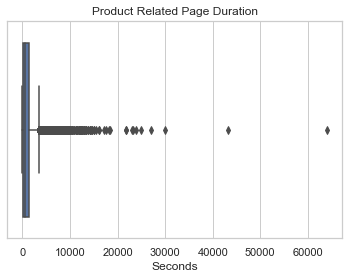

In [10]:
# check product related duration pages to see outliers
sns.set(style="whitegrid")
ax = sns.boxplot(x=shopping["ProductRelated_Duration"])
plt.title('Product Related Page Duration')
plt.xlabel('Seconds')

In [11]:
shopping.loc[shopping['ProductRelated_Duration'] > 30000.000000]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5152,17.0,2629.253968,24.0,2050.433333,705.0,43171.23338,0.004851,0.015431,0.763829,0.0,May,2,2,1,14,Returning_Visitor,True,False
8071,5.0,3398.750000,6.0,2549.375000,449.0,63973.52223,0.000764,0.027701,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False


The outliers are exceptionally different to most page times. They also didn't purchase. 

In [12]:
#how many buy vs not buy?
shopping.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

- Ratio of 5.46:1 for revenue False to True
- Skew of data towards no revenue

## Tidy up the data

In [13]:
#time to remove null columns
shopping = shopping.dropna()

In [14]:
#change -1.00 rows to 0
shopping.loc[(shopping['Administrative_Duration'] == -1.000000),'Administrative_Duration'] = 0
shopping.loc[(shopping['ProductRelated_Duration'] == -1.000000),'ProductRelated_Duration'] = 0
shopping.loc[(shopping['Informational_Duration'] == -1.000000),'Informational_Duration'] = 0
shopping.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [15]:
# Need to reformat the Month column into an integer
shopping.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

- June is different to the other months with 4 characters
- There are no Jan or Apr values, which is concerning and may skew results

In [16]:
#confirming there will likely be data gaps especially from April
shopping.Month.value_counts()

May     3363
Nov     2998
Mar     1894
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [17]:
#what are the values in visitor type?
shopping.VisitorType.value_counts()

Returning_Visitor    10537
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [18]:
#What does the VisitorType other data look like?
shopping.loc[shopping['VisitorType'] == 'Other']

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5679,0.0,0.00,4.0,225.766667,222.0,9630.209524,0.053355,0.066159,0.0,0.0,June,8,13,9,5,Other,False,False
8006,5.0,446.25,0.0,0.000000,18.0,815.250000,0.000000,0.002500,0.0,0.0,Dec,8,13,9,20,Other,False,False
8105,0.0,0.00,0.0,0.000000,8.0,493.750000,0.000000,0.050000,0.0,0.0,Nov,2,2,4,20,Other,False,False
8115,0.0,0.00,0.0,0.000000,7.0,87.000000,0.000000,0.028571,0.0,0.0,Dec,8,13,9,20,Other,False,False
8187,0.0,0.00,0.0,0.000000,4.0,129.500000,0.000000,0.050000,0.0,0.0,Dec,8,13,9,20,Other,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12156,0.0,0.00,0.0,0.000000,1.0,0.000000,0.000000,0.100000,0.0,0.0,Dec,8,13,9,20,Other,False,False
12185,0.0,0.00,0.0,0.000000,1.0,0.000000,0.200000,0.200000,0.0,0.0,Dec,8,13,9,20,Other,False,False
12219,0.0,0.00,0.0,0.000000,6.0,199.250000,0.000000,0.033333,0.0,0.0,Dec,2,4,1,3,Other,False,False
12243,3.0,18.00,0.0,0.000000,2.0,8.000000,0.000000,0.050000,0.0,0.0,Dec,8,13,9,20,Other,False,False


In [19]:
#shopping.loc[(shopping['VisitorType'] == 'Other') & (shopping['Revenue'] == 1)].count()
#shopping.loc[(shopping['VisitorType'] == 'Other') & (shopping['Revenue'] == 0)].count()
# 69 Other visitors who did not purchase and 16 who did purchase. 

In [20]:
dummy_visitor = pd.get_dummies(shopping['VisitorType'])

shopping_new = pd.concat([shopping, dummy_visitor], axis=1)

shopping_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1,1,1,1,Returning_Visitor,False,False,0,0,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,...,2,2,1,2,Returning_Visitor,False,False,0,0,1
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,4,1,9,3,Returning_Visitor,False,False,0,0,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,3,2,2,4,Returning_Visitor,False,False,0,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3,3,1,4,Returning_Visitor,True,False,0,0,1


In [21]:
dummy_month = pd.get_dummies(shopping['Month'])
shopping_new = pd.concat([shopping_new, dummy_month], axis=1)
shopping_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [22]:
shopping_new = shopping_new.drop(['VisitorType'], 1)
shopping_new = shopping_new.drop(['Month'], 1)

In [23]:
shopping_new['Revenue'] = shopping_new['Revenue'].astype(int)
shopping_new['Weekend'] = shopping_new['Weekend'].astype(int)
shopping_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


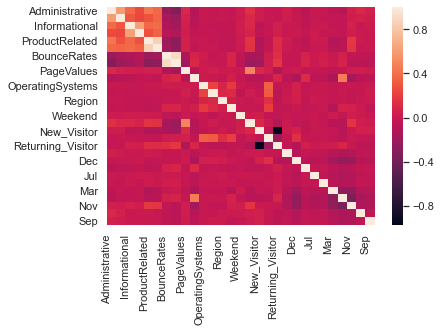

In [24]:
#Is there any obvious correlation to see?
ax = sns.heatmap(
    shopping_new.corr(), 
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

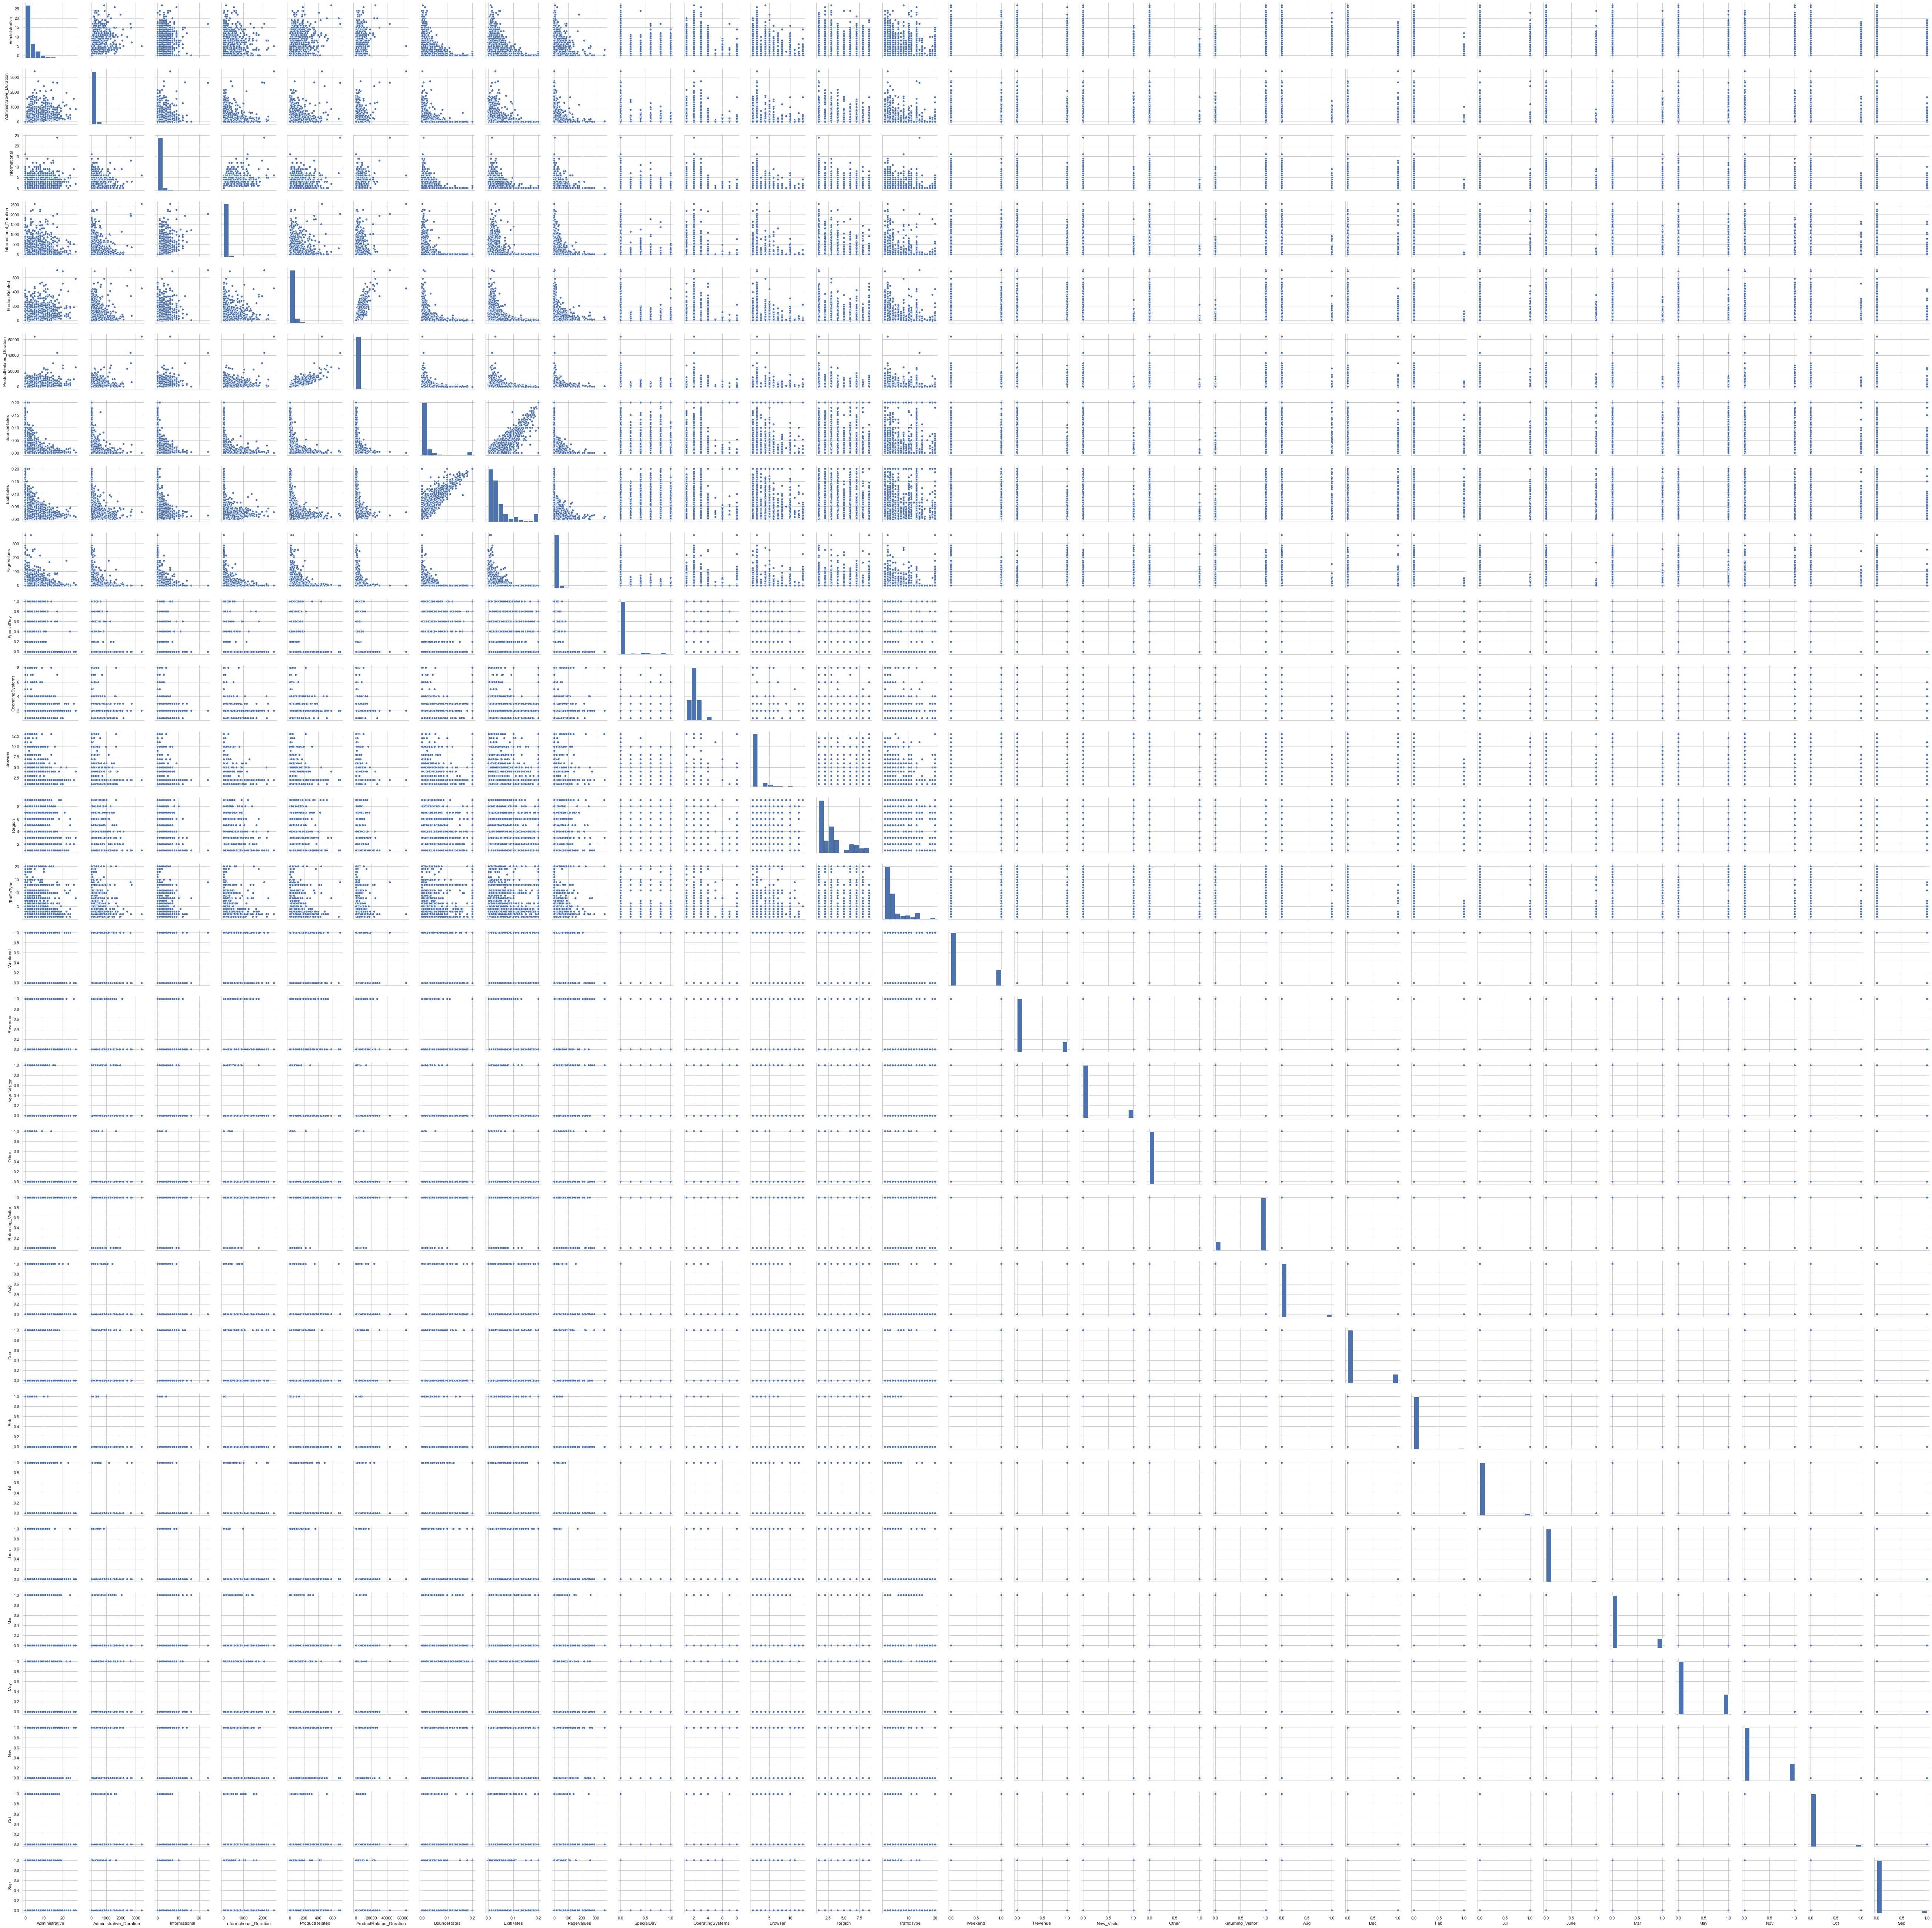

In [25]:
sns.pairplot(shopping_new)

In [26]:
#sns.pairplot(shopping_new, hue="Revenue")

In [27]:
shopping_new.groupby('Revenue').mean()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
Revenue,,,,,,,,,,,,,,,,,,,,,
0,2.120580,73.837379,0.452248,30.273930,28.748943,1071.350639,0.025275,0.047301,1.978656,0.068524,...,0.034301,0.145177,0.017390,0.035165,0.024885,0.163528,0.288048,0.215027,0.041699,0.034781
1,3.393606,119.483244,0.786164,57.611427,48.210168,1876.209615,0.005117,0.019555,27.264518,0.023166,...,0.039832,0.113208,0.001572,0.034591,0.015199,0.100629,0.191300,0.398323,0.060273,0.045073


In [28]:
#what correlation shows in the table
shopping_new.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
Administrative,1.000000,0.601460,0.376782,0.255745,0.430832,0.373646,-0.223474,-0.316192,0.098771,-0.095054,...,0.047022,-0.014768,-0.065765,0.006072,-0.002026,-0.053510,-0.064983,0.051149,0.091122,0.059470
Administrative_Duration,0.601460,1.000000,0.302643,0.237949,0.288861,0.355231,-0.144079,-0.205574,0.067458,-0.073474,...,0.027857,-0.005197,-0.044592,-0.002193,-0.019056,-0.022149,-0.039584,0.032152,0.054998,0.031218
Informational,0.376782,0.302643,1.000000,0.618961,0.374098,0.387446,-0.116071,-0.163539,0.048539,-0.048328,...,0.005821,0.002692,-0.040418,0.001834,0.007127,-0.027374,-0.038564,0.063591,-0.002689,0.009631
Informational_Duration,0.255745,0.237949,0.618961,1.000000,0.279954,0.347290,-0.074014,-0.105148,0.030781,-0.030660,...,0.001363,0.010210,-0.028093,0.014909,-0.015448,-0.011023,-0.031936,0.036759,0.006378,0.001694
ProductRelated,0.430832,0.288861,0.374098,0.279954,1.000000,0.860868,-0.204469,-0.292219,0.056067,-0.024190,...,0.027867,-0.034214,-0.056967,0.019890,0.014963,-0.113458,-0.072596,0.182006,0.008752,0.005857
ProductRelated_Duration,0.373646,0.355231,0.387446,0.347290,0.860868,1.000000,-0.184404,-0.251641,0.052622,-0.036598,...,0.007640,-0.017841,-0.046643,0.002148,0.001401,-0.084311,-0.068469,0.166632,-0.008921,0.005821
BounceRates,-0.223474,-0.144079,-0.116071,-0.074014,-0.204469,-0.184404,1.000000,0.913436,-0.119357,0.073088,...,-0.015538,-0.016707,0.063245,0.009938,0.041378,-0.005633,0.059389,-0.033895,-0.045956,-0.039999
ExitRates,-0.316192,-0.205574,-0.163539,-0.105148,-0.292219,-0.251641,0.913436,1.000000,-0.174397,0.102899,...,-0.020754,-0.014146,0.079045,0.009146,0.048597,0.010604,0.073469,-0.056112,-0.062278,-0.050777
PageValues,0.098771,0.067458,0.048539,0.030781,0.056067,0.052622,-0.119357,-0.174397,1.000000,-0.063660,...,0.000433,0.020376,-0.033183,-0.018387,-0.020861,-0.043809,-0.015267,0.037661,0.031970,0.017370
SpecialDay,-0.095054,-0.073474,-0.048328,-0.030660,-0.024190,-0.036598,0.073088,0.102899,-0.063660,1.000000,...,-0.058987,-0.124795,0.106560,-0.058917,-0.047816,-0.131732,0.464818,-0.175280,-0.066747,-0.060038


- Page values have some correlation with Revenue
- As expected exit rates and bounce rates have a negative correlation with Revenue

In [29]:
#I found a tool from the Kaggle EDA example, but it is a prototype: https://dabl.github.io/dev/
#pip install dabl - on your terminal first
import warnings
import dabl

Target looks like classification
Linear Discriminant Analysis training set score: 0.653


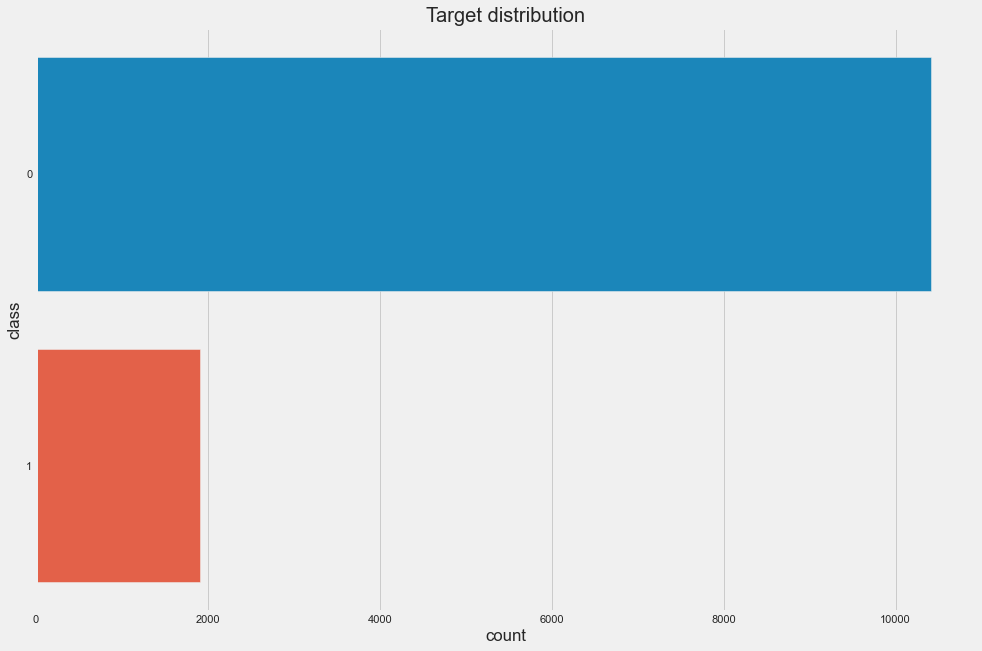

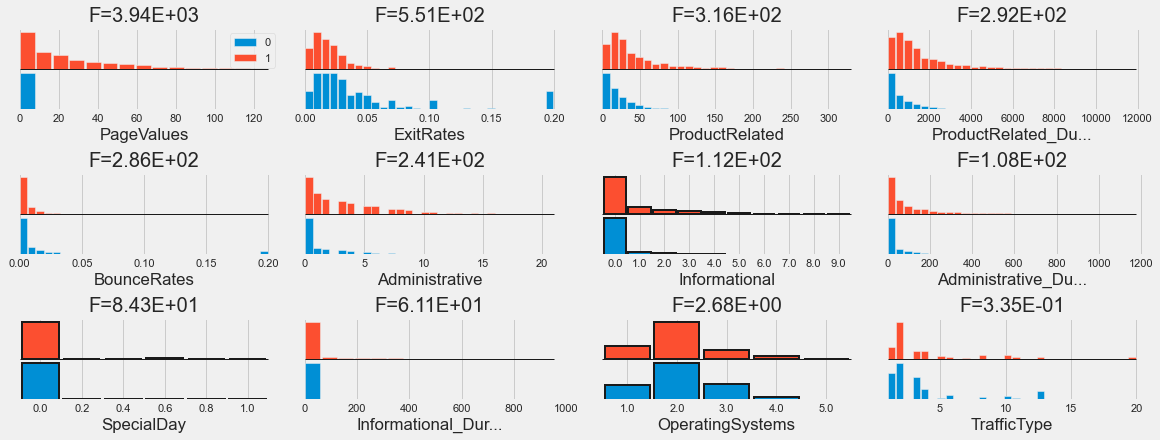

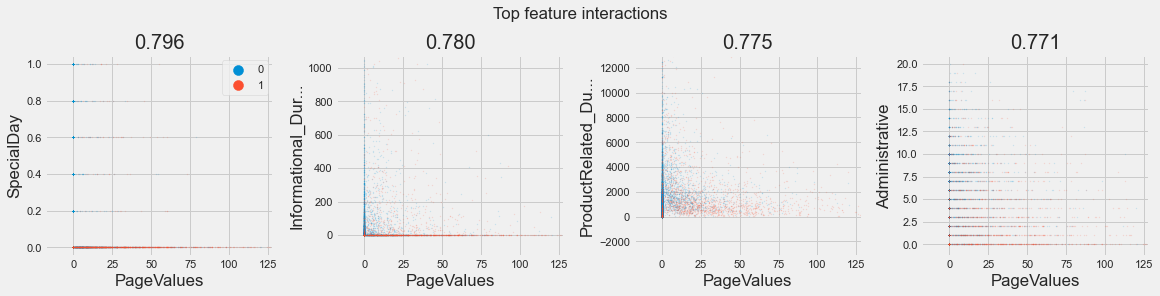

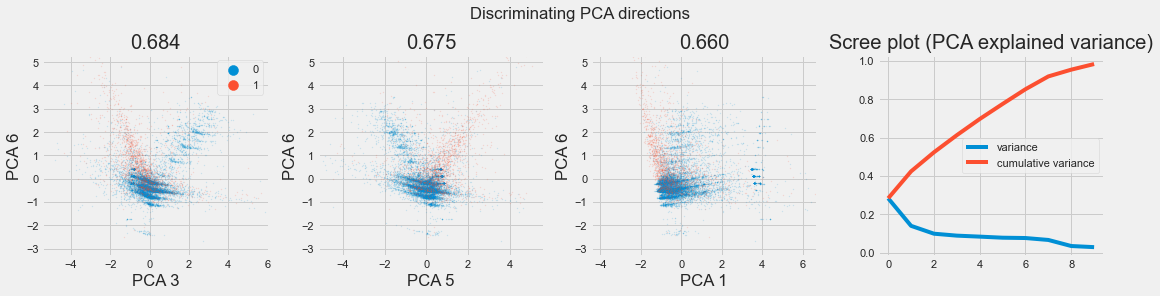

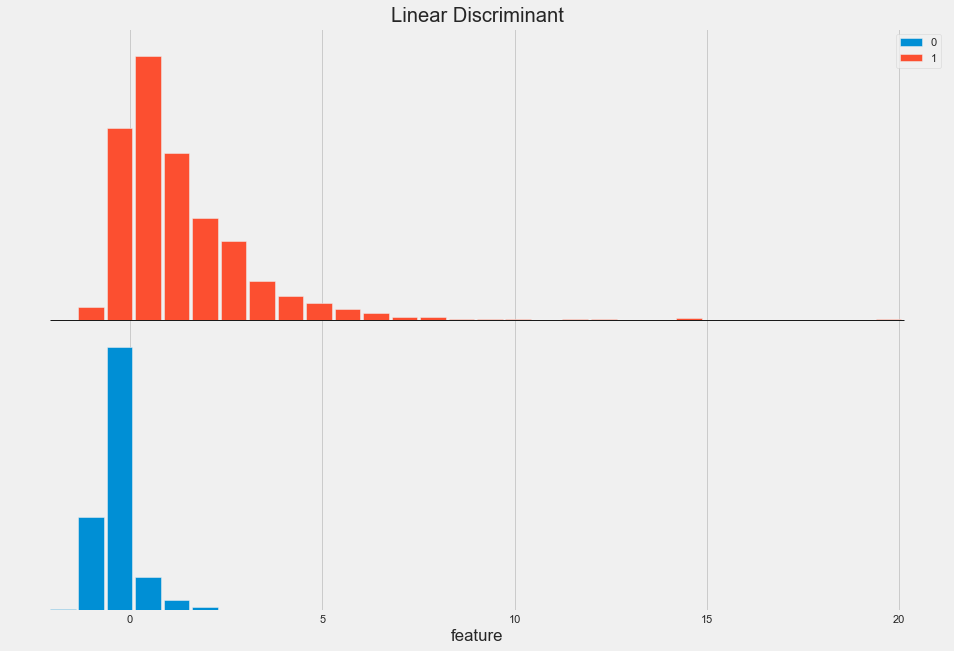

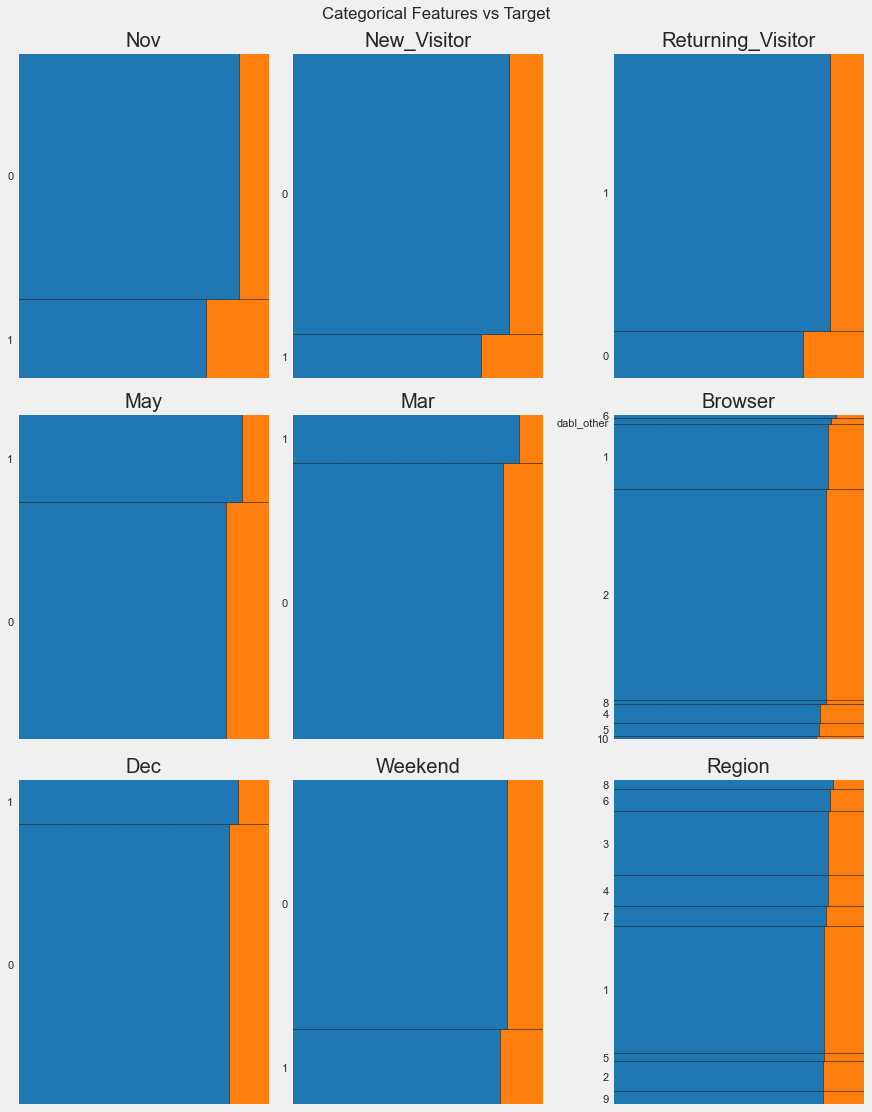

In [30]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('fivethirtyeight')
dabl.plot(shopping_new, target_col = 'Revenue')

In [31]:
#Format data types
shopping_new.dtypes
shopping_new['Returning_Visitor'] = shopping_new['Returning_Visitor'].astype(int)
shopping_new['Other'] = shopping_new['Other'].astype(int)
shopping_new['New_Visitor'] = shopping_new['New_Visitor'].astype(int)

#change all the months to int
shopping_new['Aug'] = shopping_new['Aug'].astype(int)
shopping_new['Dec'] = shopping_new['Dec'].astype(int)
shopping_new['Feb'] = shopping_new['Feb'].astype(int)
shopping_new['Jul'] = shopping_new['Jul'].astype(int)
shopping_new['June'] = shopping_new['June'].astype(int)
shopping_new['Mar'] = shopping_new['Mar'].astype(int)
shopping_new['May'] = shopping_new['May'].astype(int)
shopping_new['Nov'] = shopping_new['Nov'].astype(int)
shopping_new['Oct'] = shopping_new['Oct'].astype(int)
shopping_new['Sep'] = shopping_new['Sep'].astype(int)

#Dictionary to fix short name Months to int
#d = {'Jan':1,"Feb":2,"Mar":3,"Apr":4,"May":5,"June":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}
#shopping_new.Month = shopping.Month.map(d).astype(int)

In [32]:
shopping_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [33]:
shopping_new.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
Weekend                      int64
Revenue                      int64
New_Visitor                  int64
Other                        int64
Returning_Visitor            int64
Aug                          int64
Dec                          int64
Feb                          int64
Jul                          int64
June                         int64
Mar                          int64
May                          int64
Nov                          int64
Oct                          int64
Sep                 

In [34]:
# make a baseline using the total number of samples and number of purchases 
shopping_new.Revenue.value_counts() / shopping_new.Revenue.count()

0    0.84508
1    0.15492
Name: Revenue, dtype: float64

- We have cleaned up a lot of the data, lets standardise it now

## Standardise the data

In [35]:
#Lets standardise the relevant columns

#features = shopping_new.copy()
#scaled_features = scaled_features.set_index(shopping_new.index)
#col_names = ['Administrative','Administrative_Duration','Month','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','OperatingSystems','Browser','Region','TrafficType']


#'Weekend','New_Visitor', 'Other', 'Returning_Visitor', 'Aug', 'Dec','Feb', 'Jul', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep'

#scaler = StandardScaler().fit(sub_features.values)
#scaled_features = scaler.transform(sub_features.values)

In [36]:
features = shopping_new.copy()
scaler = StandardScaler()
col_names = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']
sub_features = features[col_names]

features[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']] = scaler.fit_transform(features[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']])

In [37]:
features.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
0,-0.697582,-0.457495,-0.396631,-0.24506,-0.691501,-0.624794,3.672627,3.235371,-0.317376,-0.309014,...,0,0,1,0,0,0,0,0,0,0
1,-0.697582,-0.457495,-0.396631,-0.24506,-0.669024,-0.591362,-0.457458,1.174592,-0.317376,-0.309014,...,0,0,1,0,0,0,0,0,0,0
2,-0.697582,-0.457495,-0.396631,-0.24506,-0.691501,-0.624794,3.672627,3.235371,-0.317376,-0.309014,...,0,0,1,0,0,0,0,0,0,0
3,-0.697582,-0.457495,-0.396631,-0.24506,-0.669024,-0.623401,0.575063,1.998904,-0.317376,-0.309014,...,0,0,1,0,0,0,0,0,0,0
4,-0.697582,-0.457495,-0.396631,-0.24506,-0.489202,-0.296997,-0.044449,0.144202,-0.317376,-0.309014,...,0,0,1,0,0,0,0,0,0,0


## Features Importance

                   variable      coef  abs_coef
8                PageValues  0.166143  0.166143
25                      Nov  0.078327  0.078327
7                 ExitRates -0.049568  0.049568
20                      Feb -0.044440  0.044440
15              New_Visitor  0.038818  0.038818
19                      Dec -0.034069  0.034069
16                    Other -0.029585  0.029585
24                      May -0.024232  0.024232
6               BounceRates  0.023277  0.023277
23                      Mar -0.022822  0.022822
5   ProductRelated_Duration  0.019717  0.019717
26                      Oct  0.019125  0.019125
21                      Jul  0.018364  0.018364
22                     June -0.016969  0.016969
18                      Aug  0.015890  0.015890
27                      Sep  0.010826  0.010826
4            ProductRelated  0.010277  0.010277
17        Returning_Visitor -0.009233  0.009233
14                  Weekend  0.007798  0.007798
10         OperatingSystems -0.007367  0

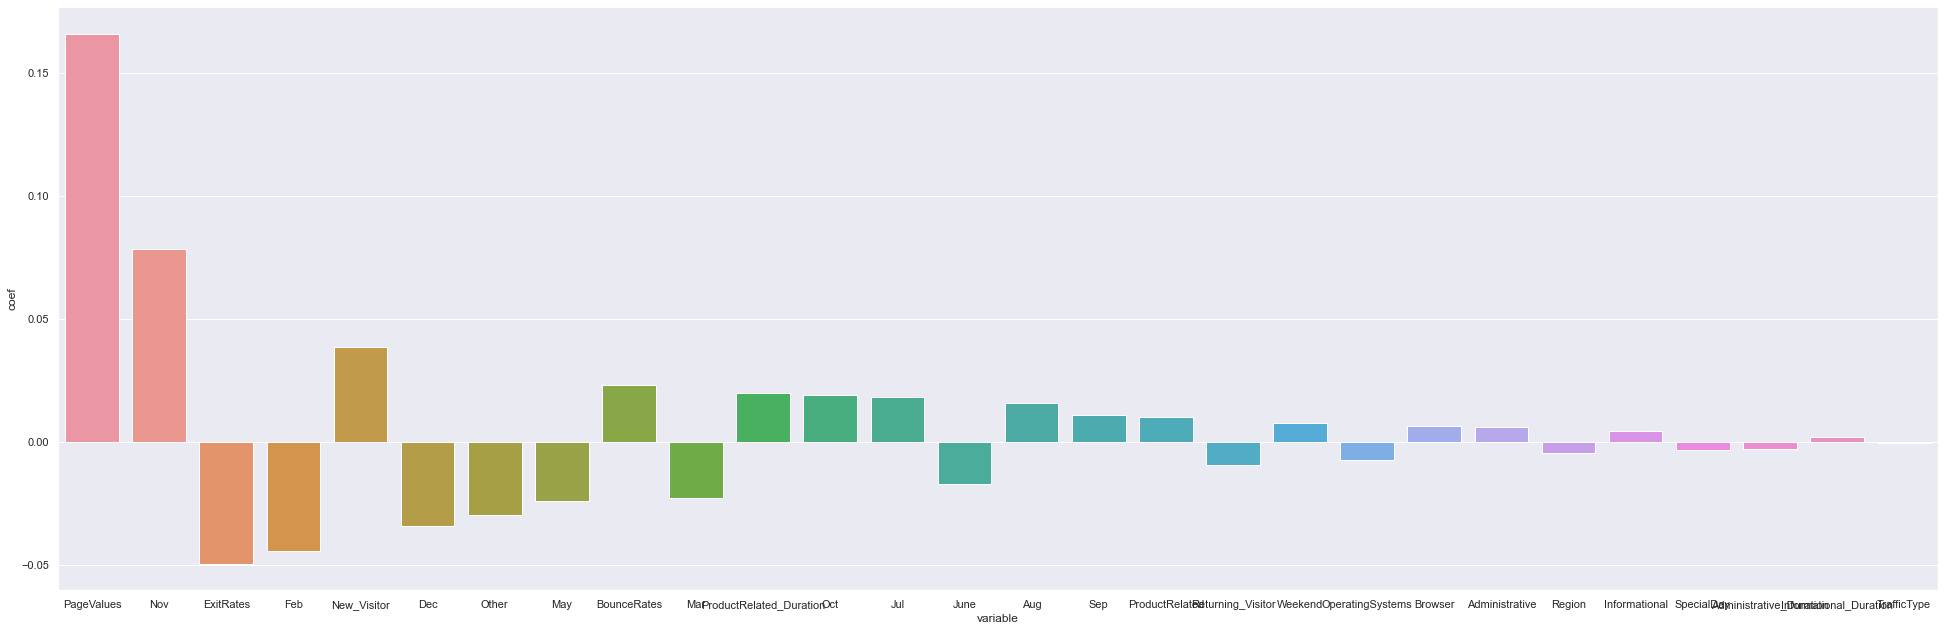

In [38]:
#pull the values and find most valuable columns
values = features
X = values.drop('Revenue', axis=1)
y = features['Revenue'].values.reshape(-1,1)

model = LinearRegression()
model.fit(X,y)

model = LinearRegression().fit(X,y)

sns.set(rc={'figure.figsize': (30, 10)})


def view_coeff(X, model):
    rs = model.coef_.reshape(-1)
    model_coefs = pd.DataFrame({'variable': X.columns,
                             'coef': rs,
                             'abs_coef': np.abs(rs)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    print(model_coefs.head(30))
    sns.barplot(x="variable", y="coef", data=model_coefs)
        
# Plot Coefficients
view_coeff(X, model)

In [39]:
## Calculate Ridge Regression model
clf = Ridge()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in ridge_alphas:
    clf.set_params(alpha = a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, model.coef_))

In [40]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X, y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X, y))

Alpha: 69.05513520162316
Score: 0.2879559745822805


                   variable      coef  abs_coef
8                PageValues  0.165300  0.165300
25                      Nov  0.075541  0.075541
7                 ExitRates -0.047753  0.047753
19                      Dec -0.034005  0.034005
20                      Feb -0.032702  0.032702
15              New_Visitor  0.032483  0.032483
24                      May -0.024055  0.024055
23                      Mar -0.022950  0.022950
6               BounceRates  0.021299  0.021299
5   ProductRelated_Duration  0.019277  0.019277
16                    Other -0.017592  0.017592
26                      Oct  0.016259  0.016259
21                      Jul  0.014938  0.014938
17        Returning_Visitor -0.014891  0.014891
22                     June -0.014624  0.014624
18                      Aug  0.012846  0.012846
4            ProductRelated  0.010977  0.010977
27                      Sep  0.008751  0.008751
14                  Weekend  0.007896  0.007896
10         OperatingSystems -0.007667  0

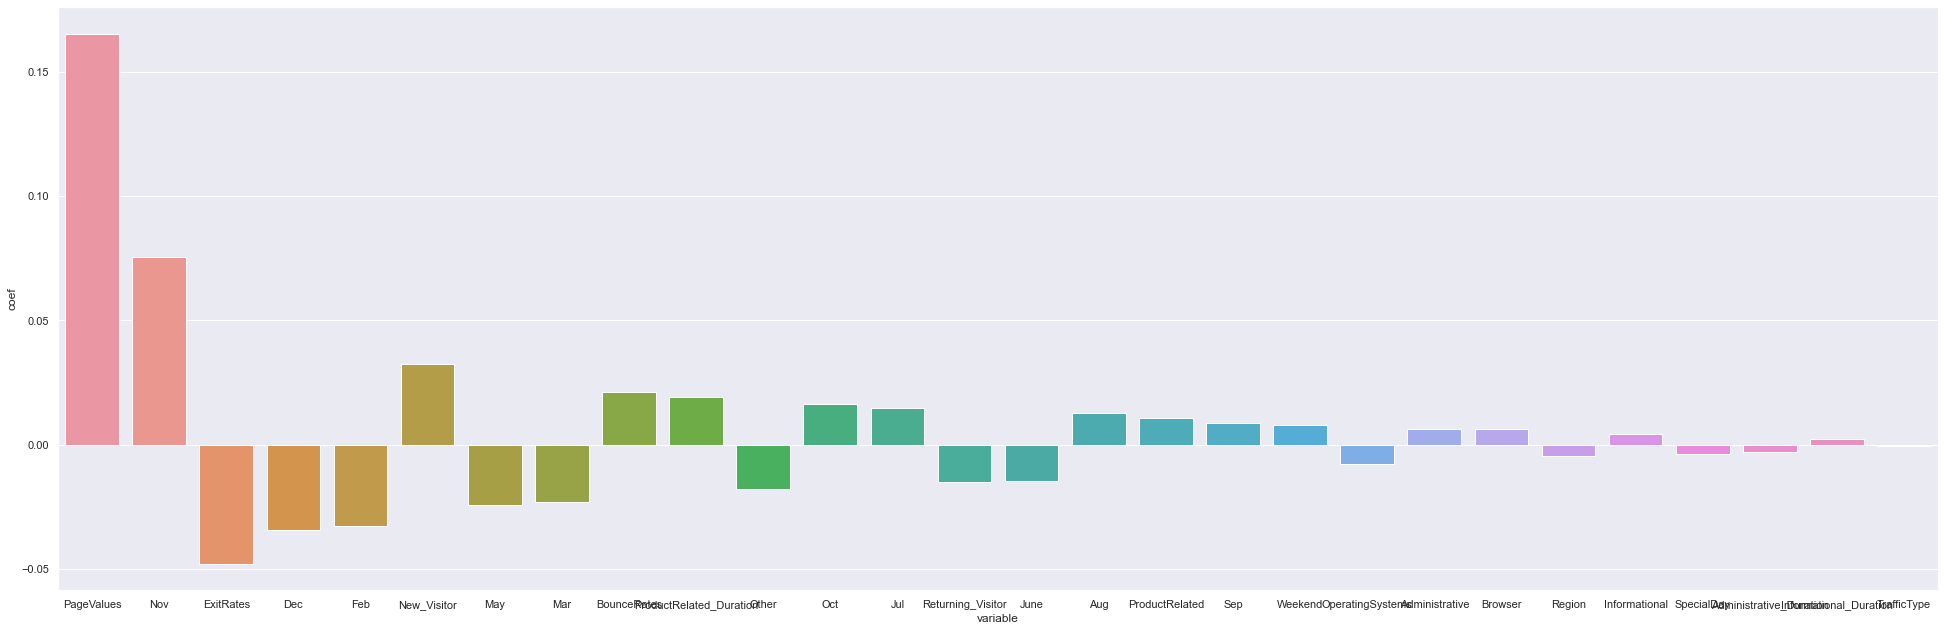

In [41]:
view_coeff(X, optimal_ridge)

More important fields
- Pages Values
- Nov
- ExitRates
- Dec
- Feb
- New_Visitor
- May
- Mar
- BounceRates
- ProductRelated_Duration

In [42]:
features_cleaned = features.drop(['Informational_Duration','Weekend','SpecialDay','Administrative_Duration','Region','TrafficType','OperatingSystems','Returning_Visitor','Other','Oct','Sep','Aug','Jul','June','ProductRelated','Administrative','Browser','Informational'], axis=1)

## Test Logistic Regression with Weighted Data

In [43]:
# try logistic regression with Statify balancing the dataset first
values = features_cleaned
X = values.drop('Revenue', axis=1)
y = features['Revenue'].values.reshape(-1,1)

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y)

#get the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, training_scores_encoded, test_size=0.2, random_state=1)

print(y_train, y_train.shape)

# #weighted data
# class_weights = class_weight.compute_class_weight('balanced',
#                                                  [0,1],
#                                                  y_train)

# manual_weights = {0: 0.58986948,1: 3.28181213}
#feature_columns = ['PageValues']

logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X,training_scores_encoded)

# Fit Model
fitmod = logreg.fit(X_train, y_train)

# Score
accuracy_score_lr = logreg.score(X_train, y_train)
print(accuracy_score_lr)

[0 0 0 ... 1 0 0] (9852,)
0.8587088915956151


In [44]:
#coef and intercept
print(logreg.coef_)
print(logreg.intercept_)

[[ 0.24662839  0.0262795  -0.75321154  2.28619692  0.32282498 -0.63666643
  -1.72949481 -0.8305652  -0.9744026   0.47032935]]
[-0.26412711]


In [45]:
#Get the accuracy and confusion matrix
y_pred_class = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

cf_matrix = confusion_matrix(y_test, y_pred_class)
print(cf_matrix)

Accuracy of logistic regression classifier on test set: 0.86
[[1791  266]
 [  91  316]]


In [46]:
#Confusion matrix guide
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


In [47]:
#get the f1, recall and precision
print(classification_report(y_test, y_pred_class))
precision = precision_score(y_test, y_pred_class, labels=[1,2], average='micro')
print('Precision: %.3f' % precision)

print(metrics.f1_score(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      2057
           1       0.54      0.78      0.64       407

    accuracy                           0.86      2464
   macro avg       0.75      0.82      0.77      2464
weighted avg       0.88      0.86      0.86      2464

Precision: 0.543
0.6390293225480284


In [48]:
#cross validating
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.89691558, 0.89894481, 0.88108766, 0.86839968, 0.87246141])

In [49]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.88 (+/- 0.02)


## Reviewing accuracy of Logistic Regression 

Whilst the accuracy score increased from the baseline of 84.5% to 85.5% in training and 85% in testing. The Confusion Matrix shows: 
- 75% of the cases were actually correctly classed (precision)
- 82% recall for how many of the positives the model predicted
- Recall has been improved, but to the detriment of precision in the macro avg
- F1 score based on the minority class resulted in 77%
- Overall accuracy is improved, 88% +/- 0.02 vs the baseline 84.5%

In [50]:
#see the percentages by result
cf_matrix/np.sum(cf_matrix)

array([[0.72686688, 0.10795455],
       [0.03693182, 0.12824675]])

In [51]:
#try to improve model by trying to edit the C parameter
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X, y)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
#coef and intercept
print(model.coef_)
print(model.intercept_)

[[ 0.1992213  -0.17529131 -0.79358221  1.5254885   0.31480407 -0.59711951
  -1.73336363 -0.49323039 -0.56205746  0.56468425]]
[-2.14418919]


In [53]:
#get the results
model.score(X, y)
print(confusion_matrix(y, model.predict(X)))
print(classification_report(y, model.predict(X)))

[[10171   237]
 [ 1177   731]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     10408
           1       0.76      0.38      0.51      1908

    accuracy                           0.89     12316
   macro avg       0.83      0.68      0.72     12316
weighted avg       0.87      0.89      0.87     12316



- By tweaking the parameter we increased the precision but reduced the recall
- Given the positive values are the minority, this isn't a better solution, since we want recall to be higher

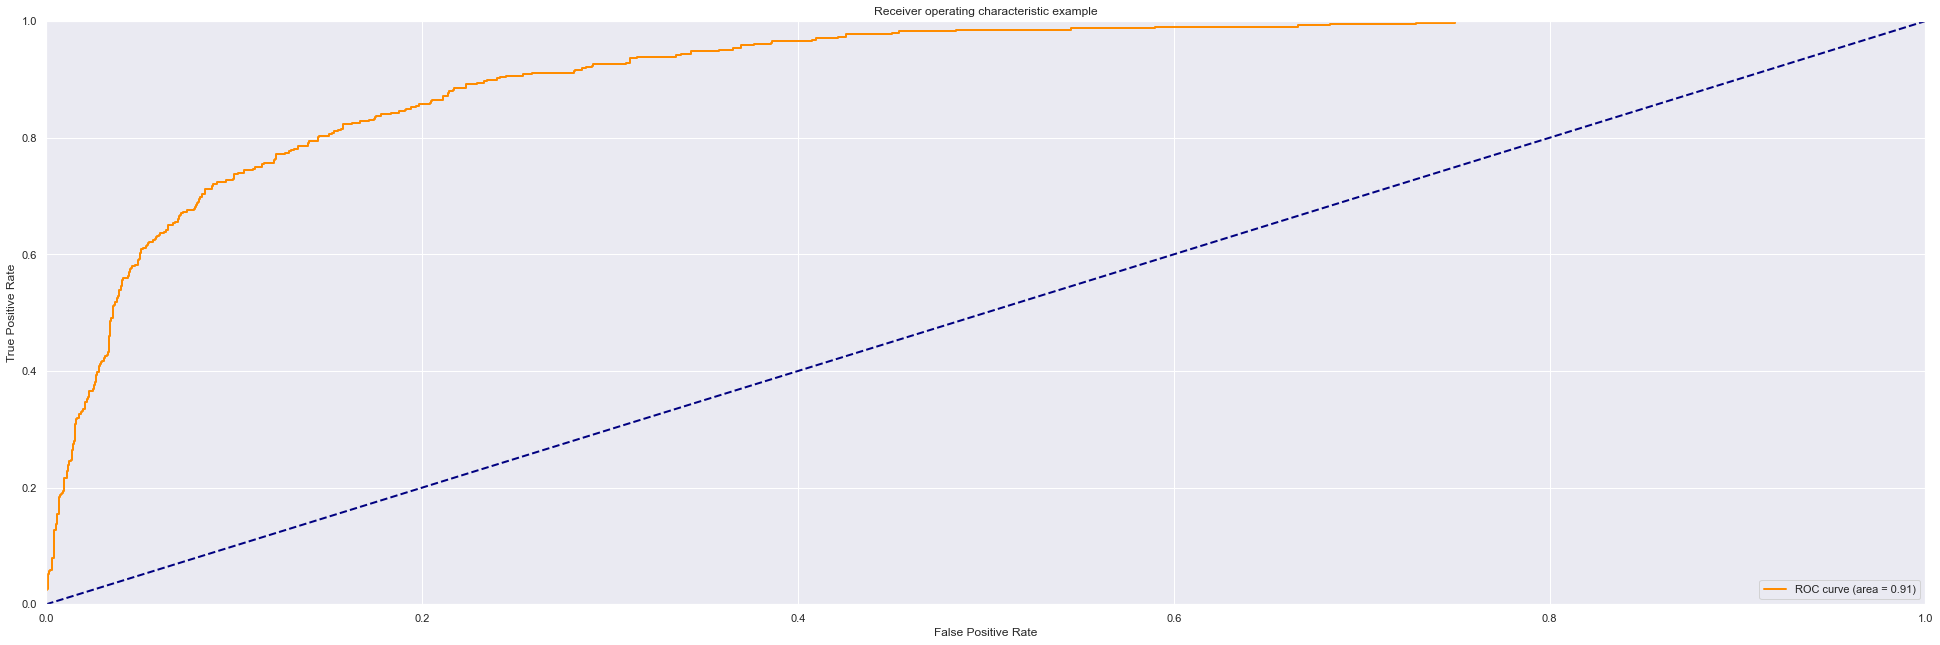

The area under the curve is: 0.91


In [54]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

roc_value = roc_auc_score(y_test, preds)
print('The area under the curve is:', round(roc_value,2))

## Try Ridge Classification

In [55]:
values = features_cleaned
X = values.drop('Revenue', axis=1)
y = features['Revenue'].values.reshape(-1,1)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20)

In [56]:
# Train the model
#rc = RidgeClassifier(class_weight='balanced')
rc = RidgeClassifier()
rc.fit(xtrain, ytrain)
score = rc.score(xtrain, ytrain)
print("Score: ", score)


# # Score
# model = LinearRegression().fit(X, y)
# r_sq = model.score(X, y)

Score:  0.8717011774259034


In [57]:
#cross validate
cv_scores = cross_val_score(rc, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

CV average score: 0.87


In [58]:
#confusion matrix
ypred = rc.predict(xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

[[2076   15]
 [ 290   83]]


In [59]:
cr = classification_report(ytest, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2091
           1       0.85      0.22      0.35       373

    accuracy                           0.88      2464
   macro avg       0.86      0.61      0.64      2464
weighted avg       0.87      0.88      0.84      2464



In [60]:
accuracy = accuracy_score(y_test, ypred)
print(accuracy)

0.8056006493506493


- tried balanced, and less accurate at 79%
- logistic regression functions better than Ridge Classification

## Try Binary Classification with SVM

In [61]:
values = features_cleaned
X = values.drop('Revenue', axis=1)
#y = features['Revenue'].values.reshape(-1,1)

#train the data
X_train, X_test, y_train, y_test = train_test_split(X, training_scores_encoded, test_size=0.20, random_state=1)

svc_model = SVC()

svc_model.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [62]:
y_predict = svc_model.predict(X_test)

In [63]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
print(cm)

[[ 224  183]
 [  84 1973]]


In [64]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2057
           1       0.73      0.55      0.63       407

    accuracy                           0.89      2464
   macro avg       0.82      0.75      0.78      2464
weighted avg       0.88      0.89      0.89      2464



In [65]:
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.8916396103896104


- No weighting applied
- f1 score isn't terrible
- Logistic regression is still better for recall

Now, to try and balance the data

In [66]:
#make a balanced model and fit
balanced_svc = SVC(kernel='linear', class_weight='balanced', probability=True)
balanced_svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [67]:
b_y_predict = balanced_svc.predict(X_test)

In [68]:
cm = np.array(confusion_matrix(y_test, b_y_predict, labels=[1,0]))
print(cm)

[[ 308   99]
 [ 194 1863]]


In [69]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2057
           1       0.73      0.55      0.63       407

    accuracy                           0.89      2464
   macro avg       0.82      0.75      0.78      2464
weighted avg       0.88      0.89      0.89      2464



In [70]:
accuracy = accuracy_score(y_test, b_y_predict)
print(accuracy)

0.8810876623376623


In [71]:
# What about AUROC?
prob_y_3 = balanced_svc.predict_proba(X)
prob_y_3 = [p[1] for p in prob_y_3]
print( roc_auc_score(y, prob_y_3) )

0.9111380165152752


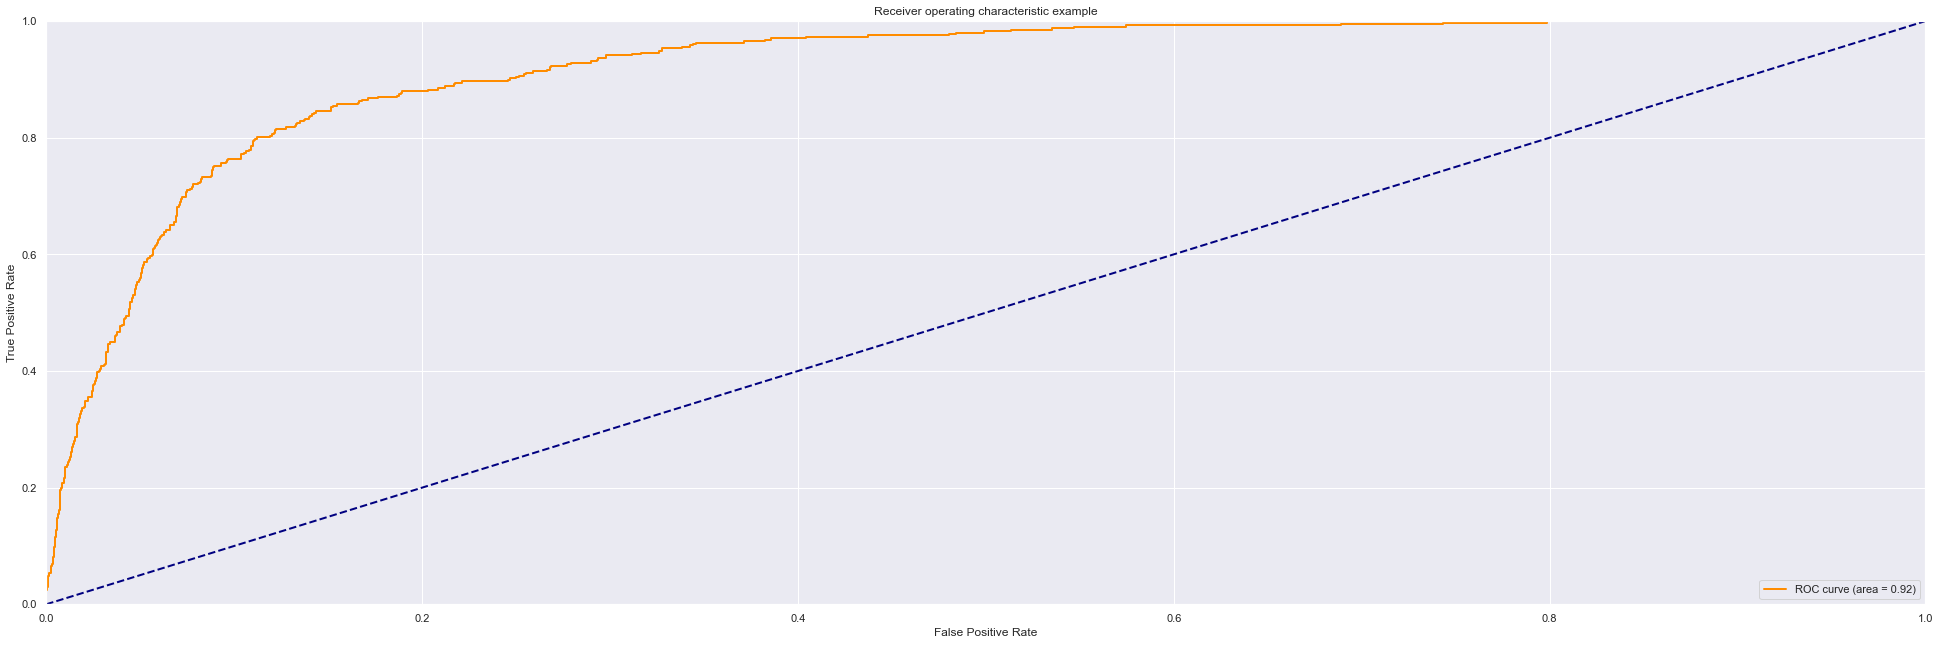

The area under the curve is: 0.92


In [72]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = balanced_svc.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

roc_value = roc_auc_score(y_test, preds)
print('The area under the curve is:', round(roc_value,2))

## Review outcomes 

#hypothesis from your investigations so far and test it

H0: There is no difference between behaviour data and purchases made

H1: There is a difference between behaviour data and purchases made

Answer: Behaviour on page values aka the relevance of pages visited as judged by google, some months, product related time spent and new visitor are indicators of Revenue= True/False

The models: 

**Logistic Regression** model was a reasonable model option: 

Accuracy: 0.88 (+/- 0.02)

Precision: 75%

Recall: 82%

f1-score: 77%

**Ridge Classification** model wasn't very reliable in comparison:

Accuracy: 80%

Precision: 84%

Recall: 63%

f1-score: 66%

**SVM** model is a slight improvement on logistic regression:

Accuracy: 91%

Precision: 78%

Recall: 83%

f1-score: 80%

**Original Class balance**

Revenue = True 15.49%

Revenue = False 84.51%